In [51]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("stocks.csv")

In [3]:
df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
...,...,...,...,...,...,...,...,...
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600


### 1. What was the change in price of the stock overtime?

Reviewing the data, we can see, the data is numeric. and time is not given. Also, weekends are missing.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


In [9]:
# stats about our data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08


#### Closing Price
The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

In [194]:
df.set_index('Date')
apple=df[df['Ticker']=='AAPL']
google=df[df['Ticker']=='GOOG']
microsoft=df[df['Ticker']=='MSFT']
netflix=df[df['Ticker']=='NFLX']
list=[apple, google, microsoft, netflix]
listt=['Apple', 'Google', 'Microsoft', 'Netflix']

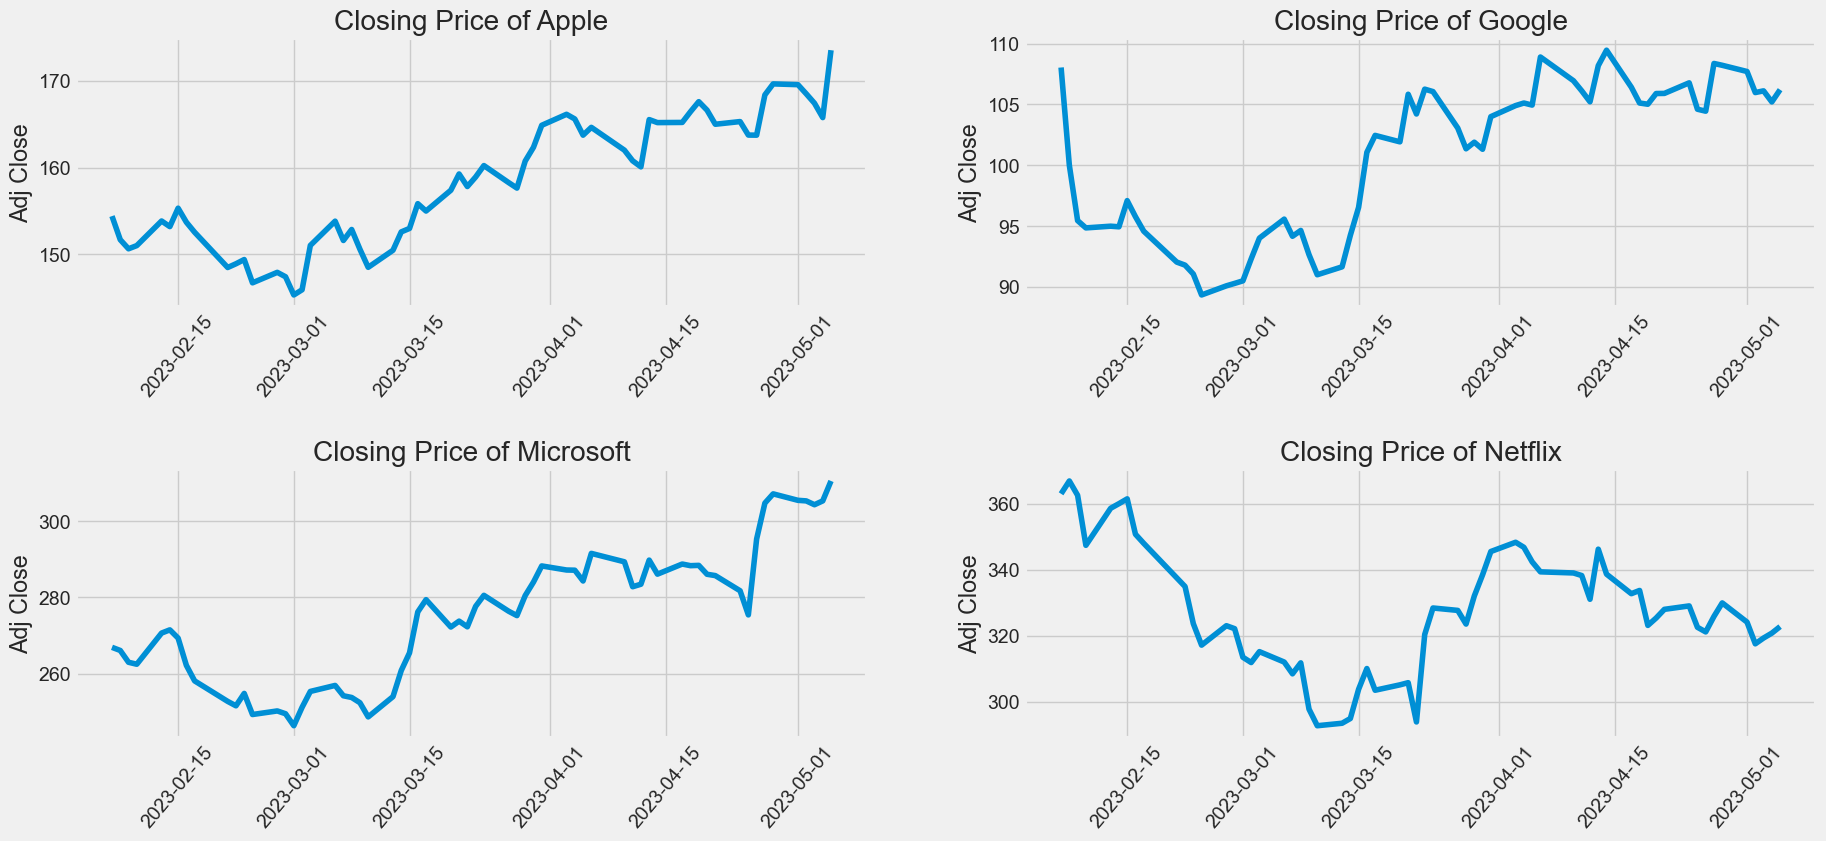

In [195]:
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
plt.figure(figsize=(20,70))
plt.subplots_adjust(top=1.8,bottom=1.7,hspace=0.6)
for i in range(4):
    list[i].set_index('Date')
    plt.subplot(2,2,i+1)
    sns.lineplot(x=list[i]['Date'],y=list[i]['Adj Close'])
    plt.xlabel(None)
    plt.title(f"Closing Price of {listt[i]}") 
    plt.xticks(None,rotation=50)

In [130]:
df['Date']=pd.to_datetime(df['Date'])

In [131]:
type(df['Date'])

pandas.core.series.Series

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Ticker     248 non-null    object        
 1   Date       248 non-null    datetime64[ns]
 2   Open       248 non-null    float64       
 3   High       248 non-null    float64       
 4   Low        248 non-null    float64       
 5   Close      248 non-null    float64       
 6   Adj Close  248 non-null    float64       
 7   Volume     248 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 15.6+ KB


#### Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

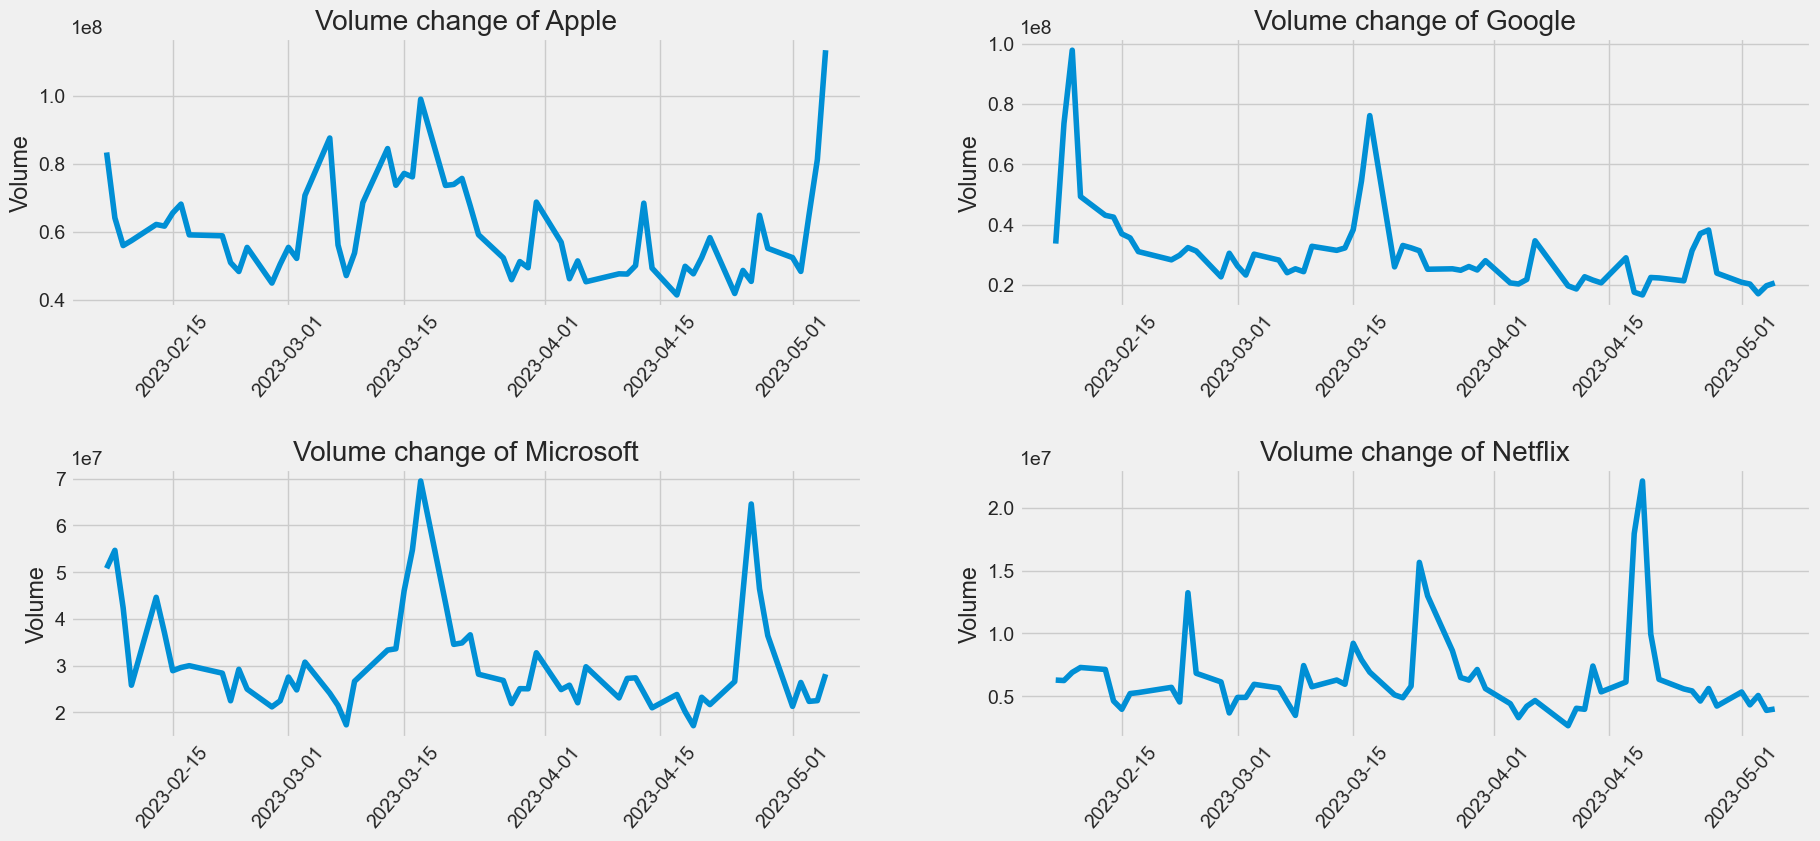

In [196]:
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
plt.figure(figsize=(20,70))
plt.subplots_adjust(top=1.8,bottom=1.7,hspace=0.6)
for i in range(4):
    list[i].set_index('Date')
    plt.subplot(2,2,i+1)
    sns.lineplot(x=list[i]['Date'],y=list[i]['Volume'])
    plt.xlabel(None)
    plt.title(f"Volume change of {listt[i]}") 
    plt.xticks(None,rotation=50)

### 2. What was the moving average of the various stocks?
The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

C:\Users\poona\AppData\Local\Temp\ipykernel_26040\1729868905.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ls[col_name]=ls['Adj Close'].rolling(window=ma).mean()


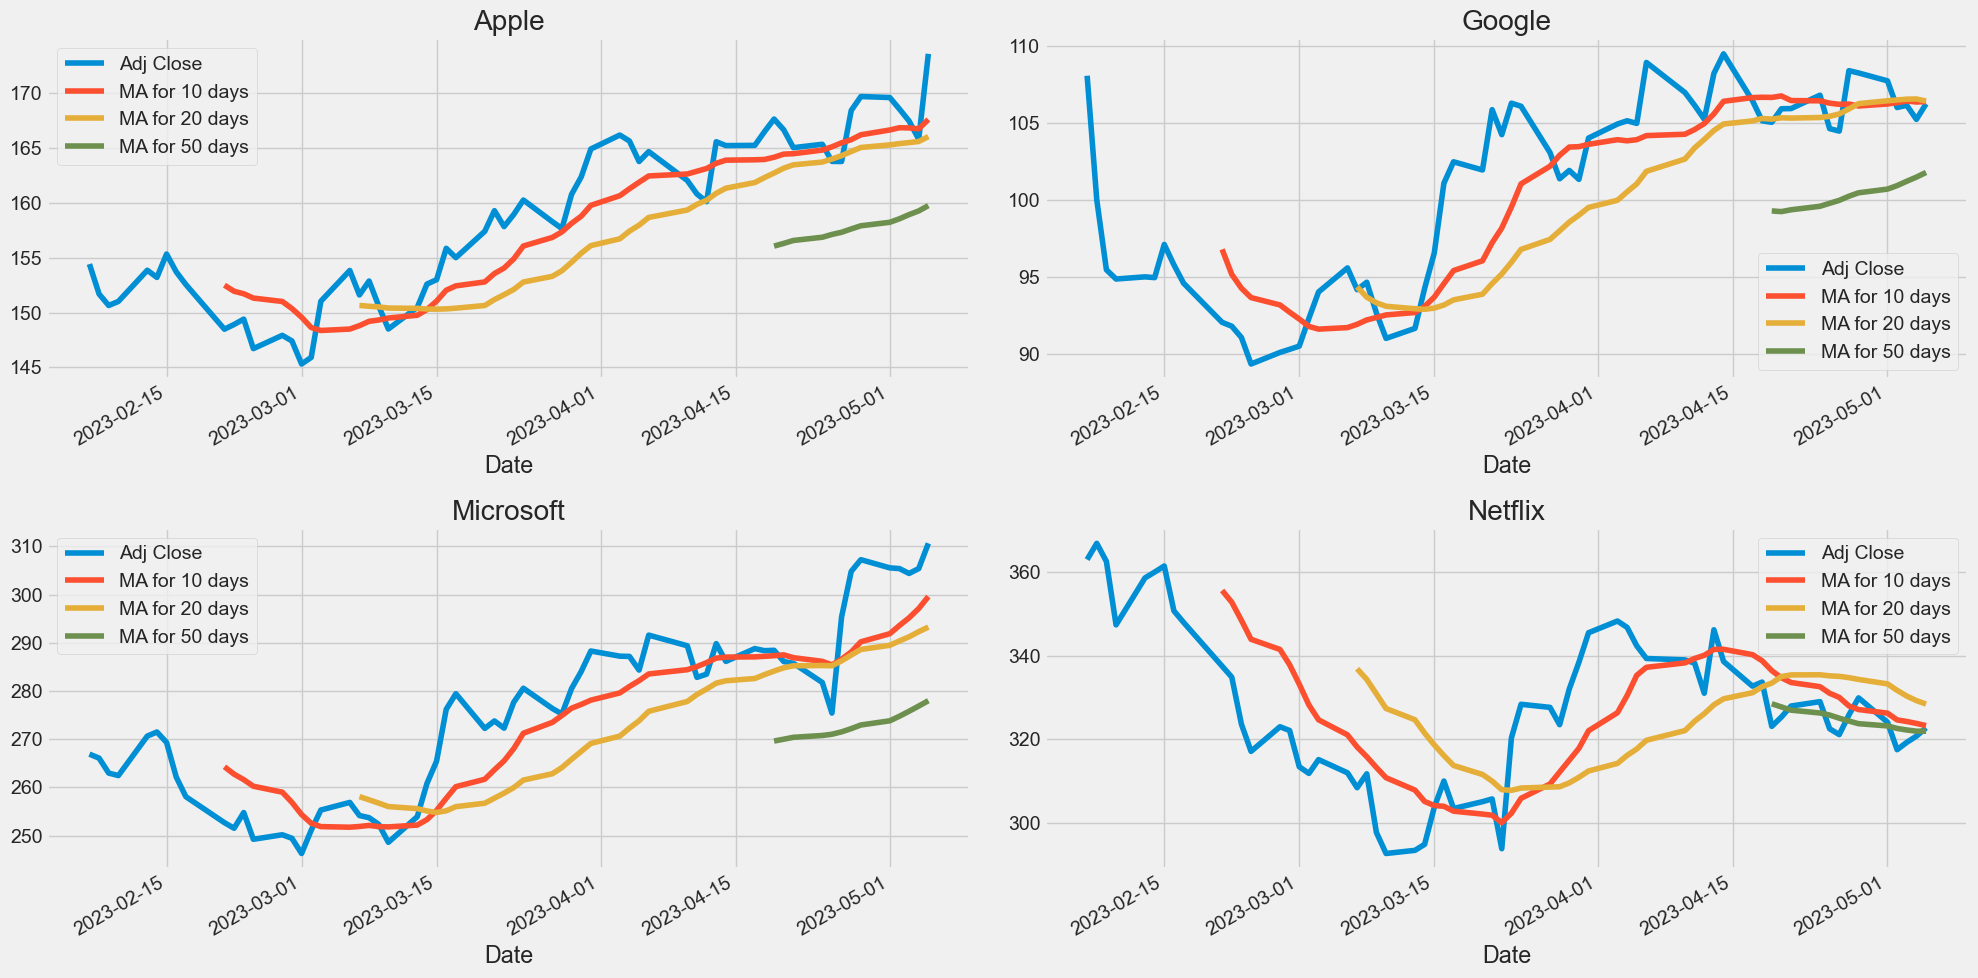

In [204]:
ma_day=[10,20,50]
# apple=apple.set_index('Date')
# google=google.set_index('Date')
# microsoft=microsoft.set_index('Date')
# netflix=netflix.set_index('Date')
for ma in ma_day:
    for ls in list:
        col_name=f"MA for {ma} days"
        ls[col_name]=ls['Adj Close'].rolling(window=ma).mean()
        

fig, axes=plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(20)
plt.subplots_adjust(top=1.8,bottom=1.7,hspace=0.6)
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
apple[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Apple')
google[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Google')
microsoft[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('Microsoft')
netflix[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Netflix')
fig.tight_layout()


we can observe from graphs. 10 and 20 moving averages are more important then others because it cover the data very closely.

### 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

Text(0.5, 1.0, 'Netflix')

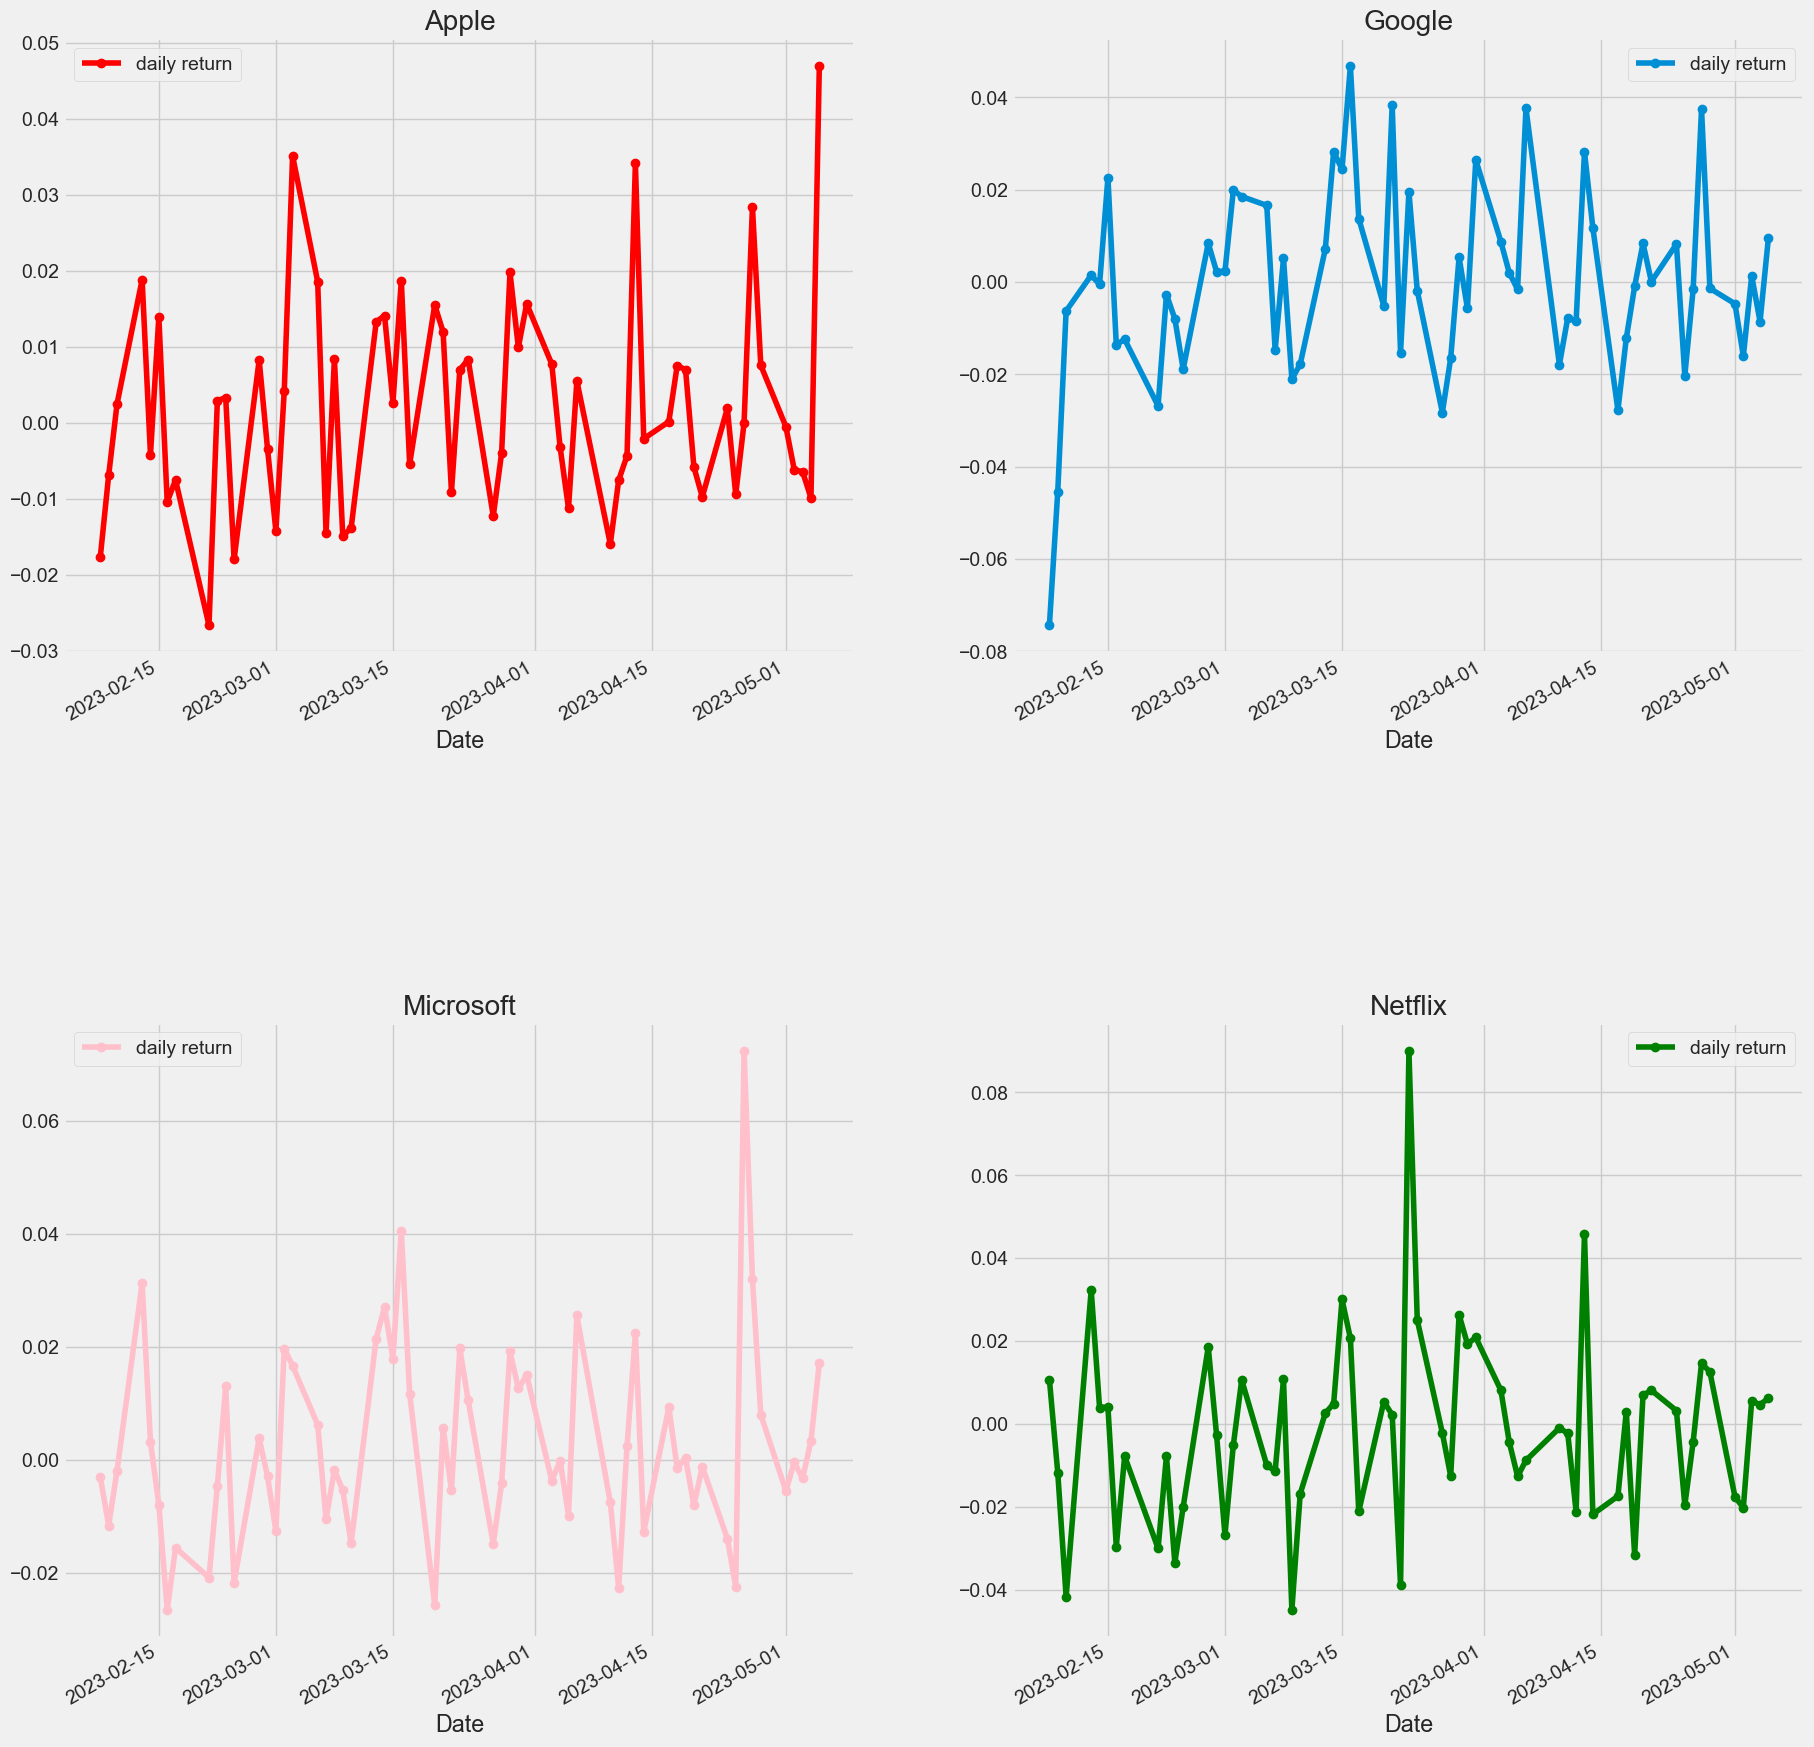

In [240]:
import datetime
import matplotlib.dates as mdates
apple['daily return']=apple['Adj Close'].pct_change()
google['daily return']=google['Adj Close'].pct_change()
microsoft['daily return']=microsoft['Adj Close'].pct_change()
netflix['daily return']=netflix['Adj Close'].pct_change()
fig, axes=plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(20)
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y=%m-%d'))
# plt.gca().set_xbound([datetime.date(2023,2,1),datetime.date(2023,5,30)])
plt.subplots_adjust(top=1.8,bottom=1.7,hspace=0.6)
apple[['daily return']].plot(ax=axes[0,0],legend=True,marker='o',color='red')
axes[0,0].set_title('Apple')
google[['daily return']].plot(ax=axes[0,1],marker='o')
axes[0,1].set_title('Google')
microsoft[['daily return']].plot(ax=axes[1,0],marker='o',color='pink')
axes[1,0].set_title('Microsoft')
netflix[['daily return']].plot(ax=axes[1,1],marker='o',color='green')
axes[1,1].set_title('Netflix')


Now, let's visualize daily return by Histogram and kde plot.

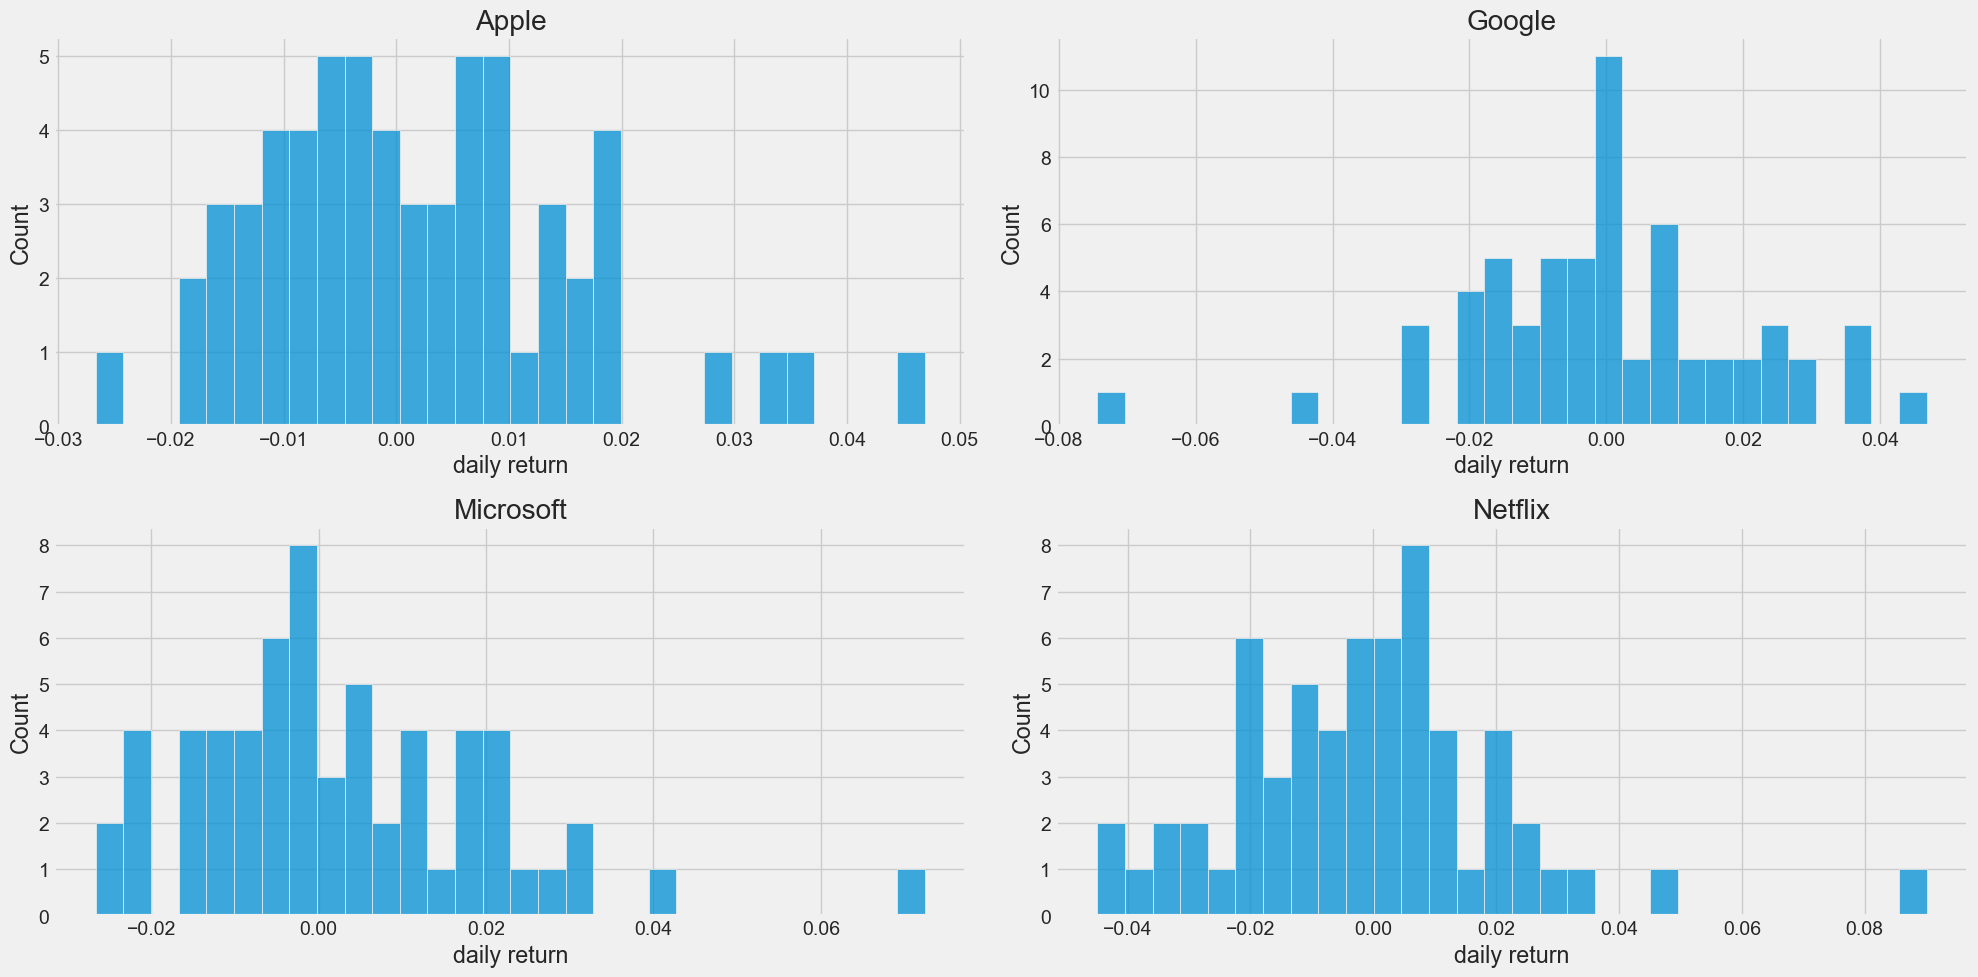

In [254]:
fig, axes=plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(20)
plt.subplots_adjust(hspace=0.6)
sns.histplot(ax=axes[0,0],data=apple,x="daily return",bins=30)
axes[0,0].set_title('Apple')
axes[0,1].set_title('Google')
axes[1,0].set_title('Microsoft')
axes[1,1].set_title('Netflix')
sns.histplot(ax=axes[0,1],data=google,x="daily return",bins=30)
sns.histplot(ax=axes[1,0],data=microsoft,x="daily return",bins=30)
sns.histplot(ax=axes[1,1],data=netflix,x="daily return",bins=30)
plt.tight_layout()

### 4. What was the correlation between different stocks closing prices?

Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [264]:
new_df=apple['Adj Close'].to_frame()
new_df['Apple']=apple['daily return']
new_df['Google']=google['daily return']
new_df['Microsoft']=microsoft['daily return']
new_df['Netflix']=netflix['daily return']
new_df=new_df.drop(['Adj Close'],axis=1)
new_df

,Apple,Google,Microsoft,Netflix
Date,,,,
2023-02-07,NaN,NaN,NaN,NaN
2023-02-08,-0.017653,-0.074417,-0.003102,0.010690
2023-02-09,-0.006912,-0.045400,-0.011660,-0.011804
2023-02-10,0.002456,-0.006285,-0.001973,-0.041766
2023-02-13,0.018807,0.001476,0.031243,0.032272
...,...,...,...,...
2023-05-01,-0.000530,-0.004713,-0.005533,-0.017610
2023-05-02,-0.006191,-0.016062,-0.000491,-0.020270
2023-05-03,-0.006467,0.001321,-0.003307,0.005511


Now, we will compare the daily percentage return of 2 stocks to check correlation between them. 
first, let's see a stock compared with itself.

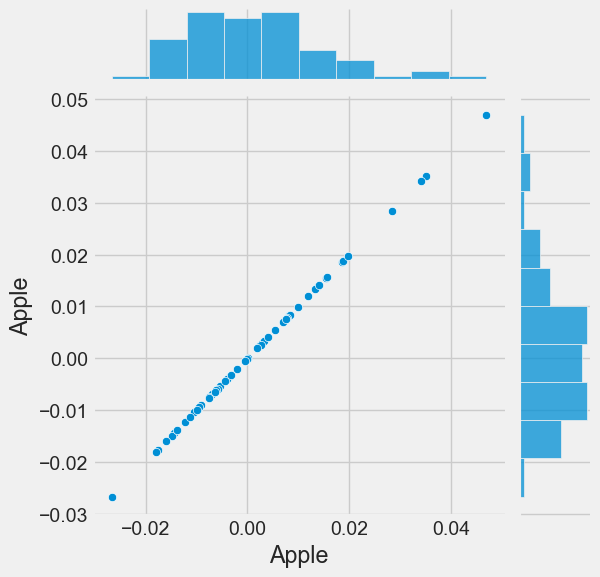

In [267]:
sns.jointplot(data=new_df,x='Apple',y='Apple',kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

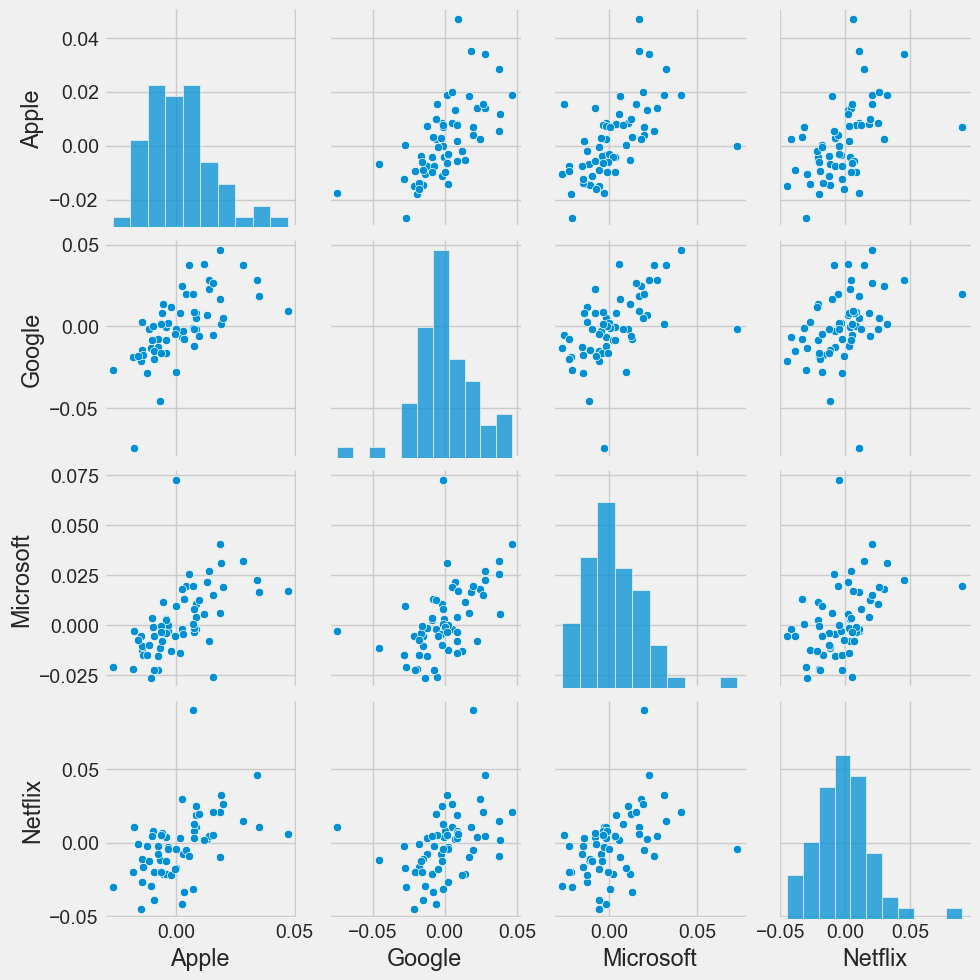

In [274]:
sns.pairplot(data=new_df)

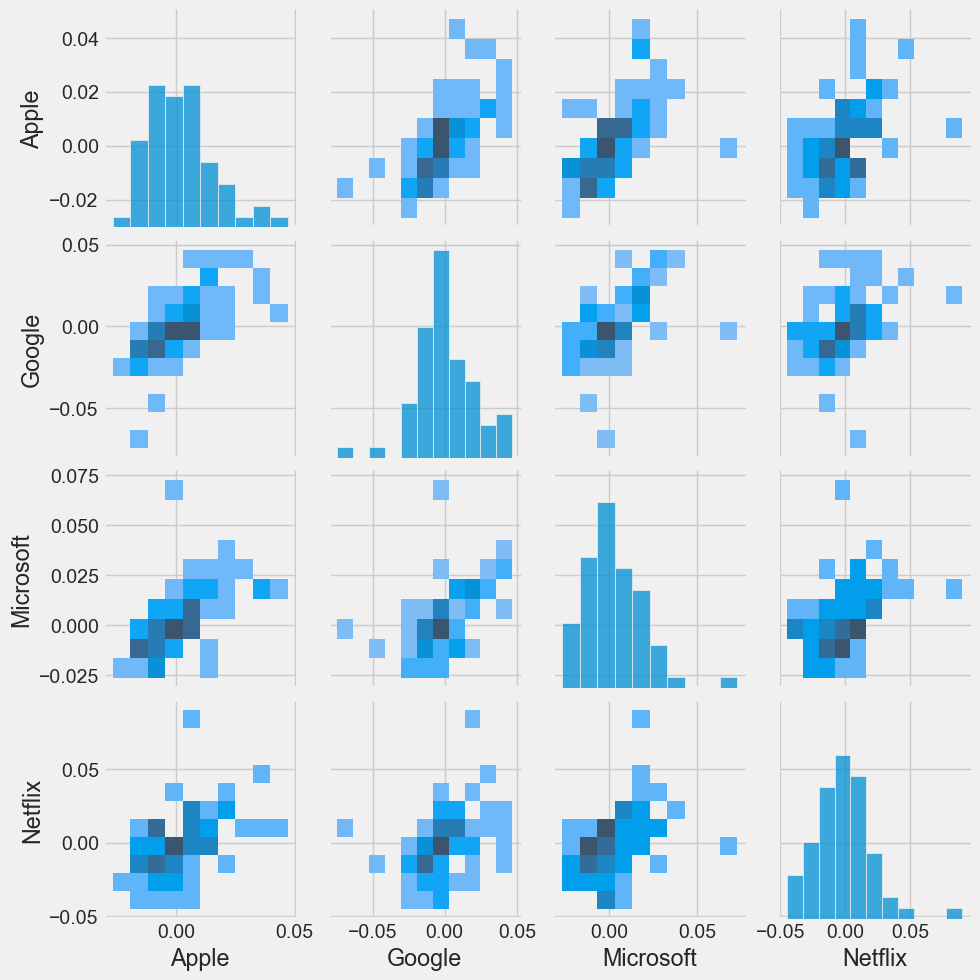

In [275]:
sns.pairplot(data=new_df,kind='hist')

'kernel density estimate'(KDE) plot is a method for visualizing the distribution in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.
In the graph below, the top most graphs are KDE plots.

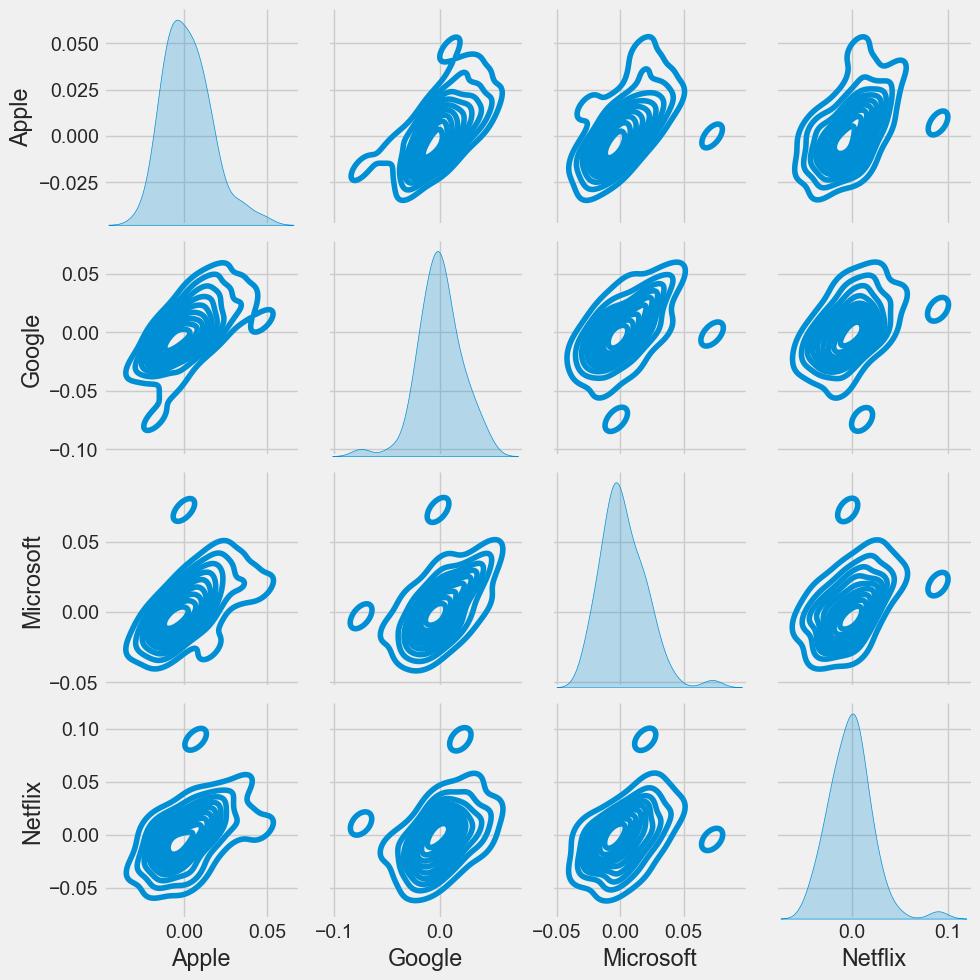

In [276]:
sns.pairplot(data=new_df,kind='kde')

Above we can see all the relationships on daily returns between all the stocks. It might be interesting to investigate that individual comaprison.

While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

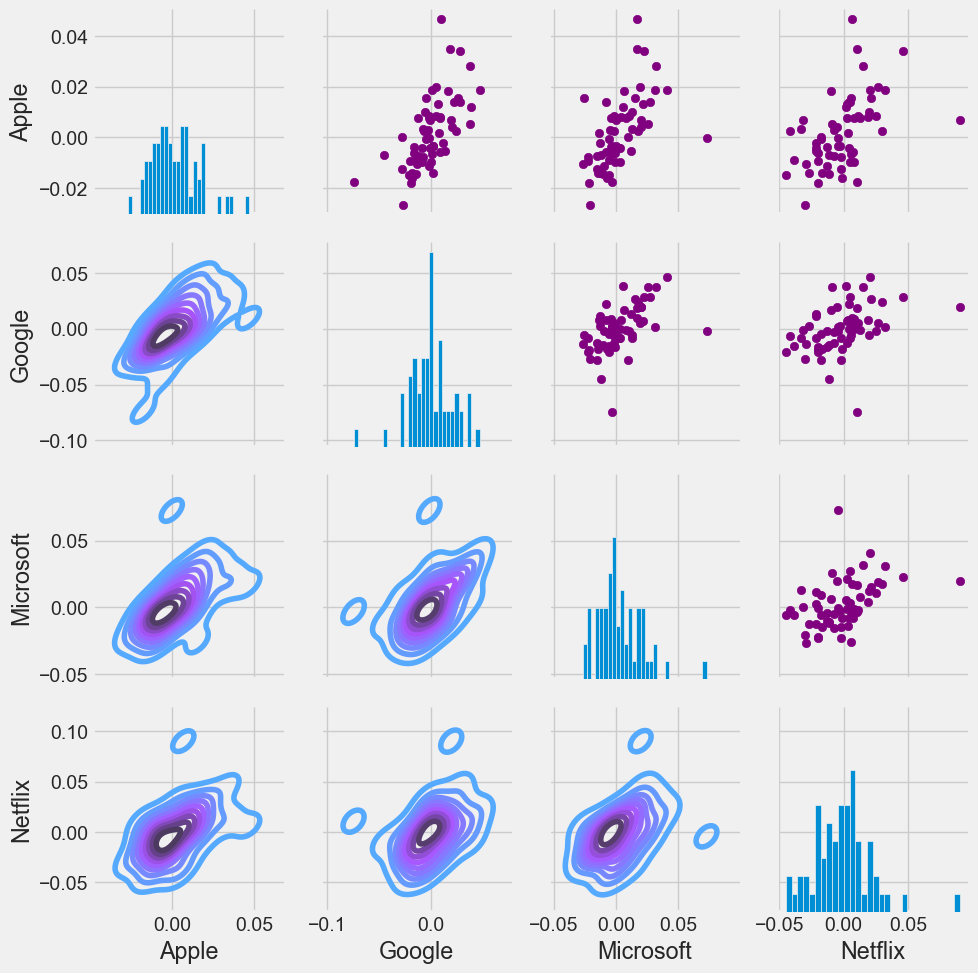

In [279]:
# set up our new figure as fig_pl, call PairPlot on the df
fig_pl=sns.PairGrid(new_df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
fig_pl.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
fig_pl.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
fig_pl.map_diag(plt.hist, bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

Text(0.5, 1.0, 'Correlation of stock return')

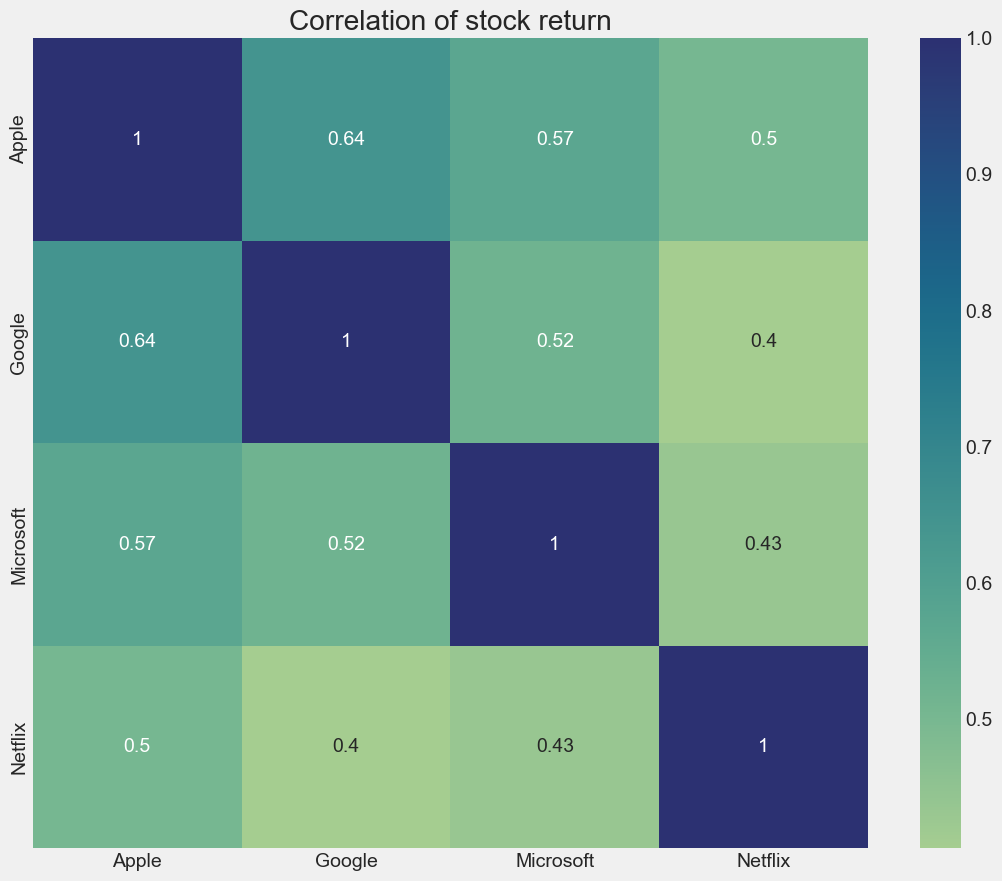

In [281]:
plt.figure(figsize=(12,10))

sns.heatmap(new_df.corr(),annot=True,cmap='crest')
plt.title('Correlation of stock return')

#### Now, we will see how opening price and adjacent closeing price are correlated.

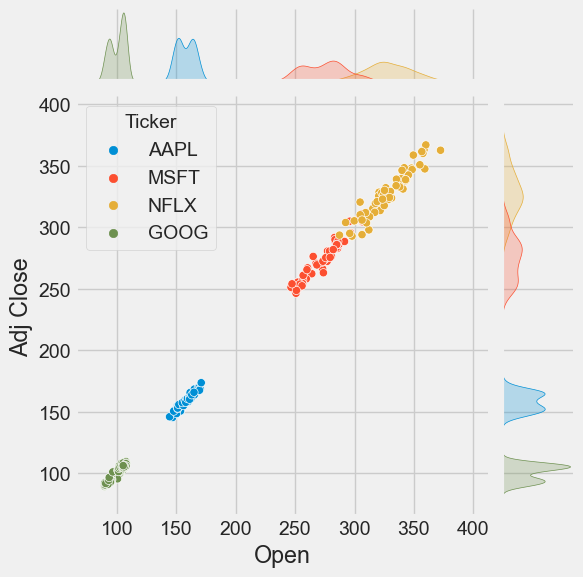

In [272]:
sns.jointplot(data=df,x='Open',y='Adj Close',hue='Ticker')

### 5. How much value do we put at risk by investing in a paticular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

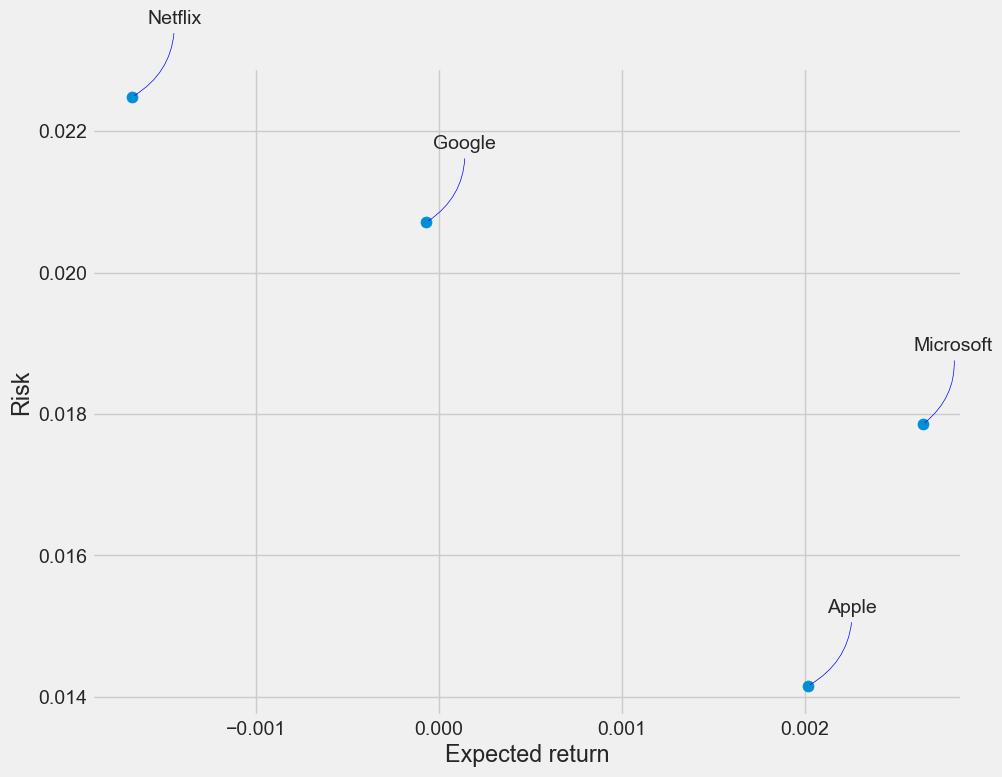

In [292]:
risk_df=new_df.dropna()
area= np.pi*20

plt.figure(figsize=(10,8))
plt.scatter(risk_df.mean(),risk_df.std(),s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
# annotation for points
for label, x,y in zip(risk_df.columns,risk_df.mean(),risk_df.std()):
    plt.annotate(label,xy=(x,y),xytext=(50,50),textcoords='offset points',ha='right',
                 va='bottom',arrowprops=dict(arrowstyle='-',color='blue',connectionstyle='arc3,rad=-0.3'))
                 

### 6. Predicting the closing price stock price of APPLE inc:

In [295]:
pip install pandas_datareader

     ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
     --- ------------------------------------ 10.2/109.5 kB ? eta -:--:--
     --- ------------------------------------ 10.2/109.5 kB ? eta -:--:--
     ---------- -------------------------- 30.7/109.5 kB 435.7 kB/s eta 0:00:01
     ---------- -------------------------- 30.7/109.5 kB 435.7 kB/s eta 0:00:01
     ---------- -------------------------- 30.7/109.5 kB 435.7 kB/s eta 0:00:01
     ------------- ----------------------- 41.0/109.5 kB 164.3 kB/s eta 0:00:01
     -------------------- ---------------- 61.4/109.5 kB 193.2 kB/s eta 0:00:01
     --------------------------- --------- 81.9/109.5 kB 229.7 kB/s eta 0:00:01
     ------------------------------- ----- 92.2/109.5 kB 228.2 kB/s eta 0:00:01


In [297]:
pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/e9/43/93ea65227c938a0a4a8925d7f054b050ea743044b887170da9eca210635a/yfinance-0.2.28-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/112.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/112.2 kB ? eta -:--:--
     --- ------------------------------------ 10.2/112.2 kB ? eta -:--:--
     --- ------------------------------------ 10.2/112.2 kB ? eta -:--:--
     ---------- -------------------------- 30.7/112.2 kB 262.6 kB/s eta 0:00:01
     ---------- -------------------------- 30.7/112.2 kB 262.6 kB/s eta 0:00:01
     ------------- ----------------------- 41.0/112.2 kB 178.6 kB/s eta 0:00:01
     -------------------- ---------------- 61.4/112.2 kB 204.8 kB/s eta 0:00:01
     --------------------------- --------- 81.9/112.2 kB 241.3 kB/s eta 0:00:01
     ------------------------------ ------ 92.2/112.2 kB 238.8 kB/s eta 0:00:01
     ---------------

In [300]:
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime
yf.pdr_override()
daf=pdr.get_data_yahoo('AAPL',start='2012-01-01', end=datetime.now())
daf

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.466097,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.533087,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.672232,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.804706,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.784391,394024400
...,...,...,...,...,...,...
2023-09-15,176.479996,176.500000,173.820007,175.009995,175.009995,109205100
2023-09-18,176.479996,179.380005,176.169998,177.970001,177.970001,67257600
2023-09-19,177.520004,179.630005,177.130005,179.070007,179.070007,51826900


Text(0, 0.5, 'Closing price')

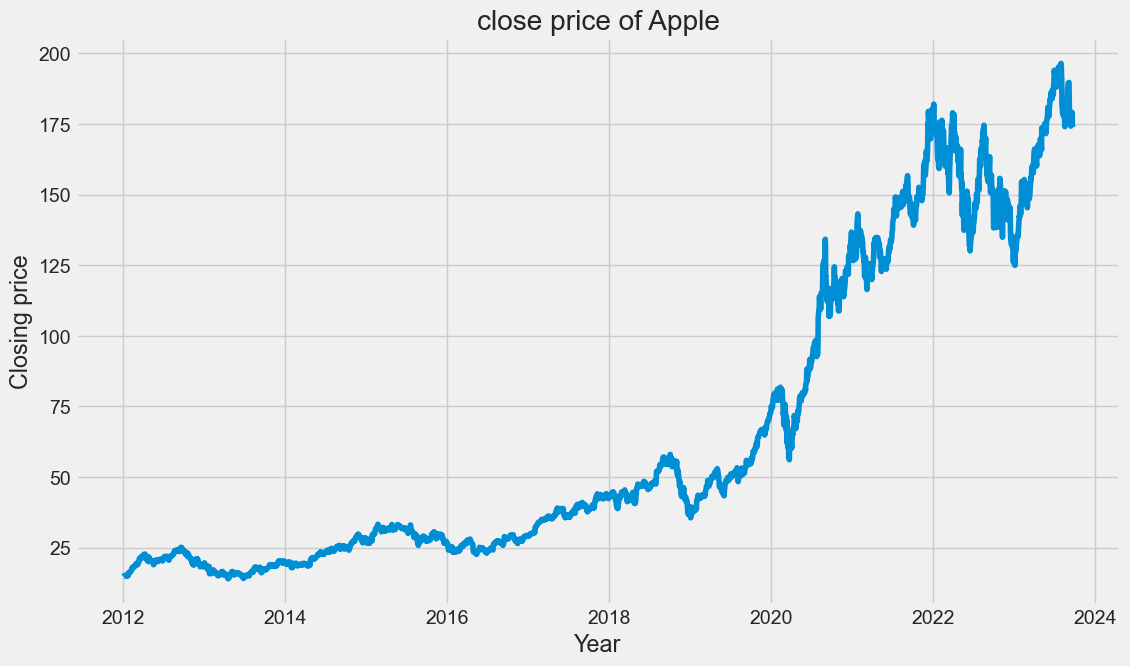

In [308]:
plt.figure(figsize=(12,7))
plt.plot(daf.Close)
plt.title('close price of Apple')
plt.xlabel('Year')
plt.ylabel('Closing price')
